# GD en el perceptrón

El método de gradiente descendiente es un método de optimización que se basa en observar el gradiente de una función (idealmente convexa, aunque muchas veces no se tiene esto) para encontrar el mínimo de esta función. Aquí veremos cómo se puede aplicar este método al perceptrón.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparación de los datos

Trabajaremos con un dataset de clasificación binaria. Cada dato de entrada será un vector $x \in \mathbb{R}^7$, donde cada entrada representa una variable aleatoria que describe al objeto. El objetivo será clasificar los datos en clase 1 (gato) o clase 0 (no gato).

In [2]:
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


Obtendremos el conjunto de datos $X$, compuesto de los vectores de entrenamiento y sus clases $Y$. De esta forma, trabajaremos con un conjunto supervisado:

$$\mathcal{S} = \{(x,y) : x\in\mathbb{R}^7, y \in\{0,1\}\}$$

In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
m,n = X.shape

## Aprendizaje por GD

Para aplicar el algoritmo de gradiente descendiente, necesitamos determinar la arquitectura de la red; como hemos señalado se tratará de un perceptrón con dos neuronas de salida (una para la clase 0 y otra para la clase 1).

### Selección de hiperparámetros

Teniendo ya el dataset supervisado, faltará determinar los <b>hiperparámetros</b>. Estos serán los siguientes:

In [4]:
#Número de itraciones
its = 100
#Rango de aprendizaje
lr = 0.2

#### Entrenamiento de la red

Seguiremos los pasos del algoritmo de aprendizaje para poder obtener los parámetros óptimos de la red neuronal. 

1. <b>Inicialización:</b> Seleccionaremos un conjunto de parámetros $\theta = \{w,b\}$ de manera aleatoria. Dividimos entre $\sqrt{n}$ para ajustar la varianza.

In [5]:
#Semilla
np.random.seed(0)
#Inicialización de los parámetros
w = np.random.rand(n,2)/np.sqrt(n)
b = np.ones(2)

2. <b>Entrenamiento:</b> Para el entrenamiento, determinamos los siguientes pasos:
    
    2.1. <b>Forward:</b> Se corre la red hacia adelante. Obtenemos la salida el vector (en $\mathbb{R}^2$): $\phi(x) = Softmax(wx+b)$
    
    2.1. <b>Backward:</b> Utilizaremos la función de entropía cruzada como función de riesgo: $$R(\theta) = -\sum_x y \ln \phi_1(x) + (1-y) \ln (\phi_0(x))$$
    
    Determinaremos los pesos a partir del algoritmo de gradiente descendiente: $$\theta_i \leftarrow \theta_i - \eta \nabla_iR(\theta)$$ Donde $y$ es la clase de los datos. Además, la probabilidad se determinará por la función Softmax y $\theta = \{w,b: w \in \mathbb{R}^{7\times 2}, b \in \mathbb{R}^2\}$. De la derivada del Softmax, asumiendo que $a$ el la preactivación, tenemos que:
    
    $$\frac{\partial R(\theta)}{\partial \theta_i} = \frac{\partial R(\theta)}{\partial \phi_j} \frac{\partial \phi_j}{\partial a}\frac{\partial a}{\partial \theta_i} = -\sum_x (\frac{1}{\phi_j}\phi_j(\delta_{i,j}-\phi_i))x_i$$
    
    De aquí que: $$\frac{\partial R(\theta)}{\partial \theta_i} = \sum_x -(\delta_{i,j}-\phi_i)x_i$$
    
    Y ya que $\delta_{i,j}$ es 1 cuando la clasificación es la correcta y 0 cuando no, podemos sustituirlo por $y$. Por tanto: $$\nabla_iR(\theta) = \sum_x (\phi(x)-y) \cdot x_i$$
    
3. <b>Terminación:</b> Terminaremos el algoritmo de GD cuando se hayan realizado el número de iteraciones especificadas.

In [6]:
%%time
#Detenerse
stop = False
t = 0
#Guarda función de riesgo
R = np.zeros(its+1)
while  stop == False:
    #FORWARD
    #Funcion de preactivacióm
    a = np.dot(X,w)+b
    #Función de activación
    exp = np.exp(a-np.max(a))
    pred = exp/exp.sum(1,keepdims=True)
    
    #Acumula función de riesgo
    R[t] = -(Y*np.log(pred[:,1]) + (1-Y)*np.log(pred[:,0])).sum()

    #BACKWARD
    #Error
    pred[range(m),Y] -= Y
    #Derivada
    DW = np.dot(X.T,pred)
    Db = pred.sum(0)
    
    #ACTUALIZACIÓN
    #Gradiente descendiente
    w -= lr*DW
    b -= lr*Db
    
    t += 1
    #Criterio de paro
    if t > its: 
        stop = True

CPU times: user 9.12 ms, sys: 618 µs, total: 9.74 ms
Wall time: 9.08 ms


Podemos ver cómo se comporta la función de riesgo a través de las iteraciones para saber si el método de GD está reduciendo, en efecto, el valor de la función en cada iteración.

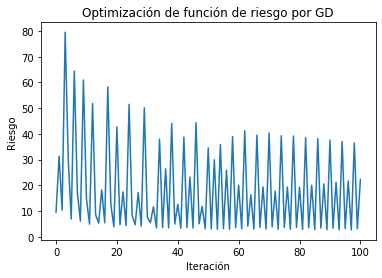

In [7]:
plt.plot(R)
plt.title('Optimización de función de riesgo por GD')
plt.ylabel('Riesgo')
plt.xlabel('Iteración')
plt.show()

#### Aplicación de la red

Una vez que tenemos los parámetros óptimos, podemos decir que tenemos una red que soluciona el problema (en mayor o menor medida) al que nos enfrentamos. Aplicación de la red a los datos: La elección de una clase se hace como:

$$\hat{y} = \arg\max_y p(Y=y|x) = \arg\max_i \phi_i(x)$$

In [8]:
#Predicción
def forward(X):
    #Pre-activación
    a = np.dot(X,w)+b
    #Activación
    exp = np.exp(a)
    f = exp/exp.sum(1,keepdims=True)
    #Clasificación
    cl = np.argmax(f, axis=1)
    
    return cl, f

In [9]:
clases, probs_X = forward(X)
print('Clases predichas: {} \nClases esperadas: {} \nError: {}'.format(clases,Y, np.abs(clases-Y).sum(0)/len(Y)))

Clases predichas: [0 0 0 0 0 1 0 1 0 0 0 0 1 1] 
Clases esperadas: [1 0 0 0 0 1 0 1 0 0 0 0 1 1] 
Error: 0.07142857142857142


Con esta red neuronal estimada, podemos aplicarla a casos que no necesariamente aparecieron en el dataset.

In [10]:
clases, probs = forward([[0,1,1,0,0,0,0],
                         [1,0,0,1,1,1,1]])
print('Clases predichas: {}'.format(clases))

Clases predichas: [1 0]


#### Exploración de los pesos

El perceptrón que hemos definido, determina las probabilidades para la clase 1 (gato) y la clase 0 (no gato) y elige la clase que maximice la probabilidad.

Las probabilidades de salida son:

In [11]:
pd.DataFrame(data=np.concatenate((probs_X,Y.reshape(14,1)), axis=1), 
             columns=['Prob. clase 0', 'Prob. clase 1', 'Clase'])

,Prob. clase 0,Prob. clase 1,Clase
0,0.563958,0.436042,1.0
1,0.571438,0.428562,0.0
2,0.937708,0.062292,0.0
3,0.924006,0.075994,0.0
4,0.868989,0.131011,0.0
5,0.006439,0.993561,1.0
6,0.970421,0.029579,0.0
7,0.159770,0.840230,1.0
8,0.828278,0.171722,0.0
9,0.872420,0.127580,0.0


Los pesos de las conexiones que ha aprendido para la clase 1 (gato) son los siguientes:

In [12]:
pd.DataFrame(data=np.append(w[:,1],b[1]), index=list(data.columns)[:7]+['bias'], columns=['Pesos de clase gato'])

,Pesos de clase gato
¿es animal?,-71.895930
¿es mamífero?,-38.789271
¿es felino?,-38.285538
¿es doméstico?,-48.639444
¿tiene dos orejas?,-50.412084
¿es negro?,-40.942354
¿tiene cuatro patas?,-51.907203
bias,-90.861263
